## Cumulative Distribution Function and Quantiles

So far we considered the probability of obtaining a certain number of successes in a given number of trials. But what if we want to know the probability of obtaining a certain number of successes or less? Or a certain number of successes or more?

The cumulative distribution function (CDF) of a distribution is the probability that the variable takes a value less than or equal to $x$. The CDF is defined as follows:

$$F(x) = P(X \leq x)$$

where $F(x)$ is the CDF of the distribution, $X$ is a random variable, and $x$ is a value of the random variable $X$.

### Calculating the CDF

For the discrete distributions we have seen so far, it's simple, we just *sum the probabilities* of all values until the value we are interested in.

Formally, their CDF is calculated as follows:

$$F(x) = \sum_{i=0}^x P(X = i)$$

where $F(x)$ is the CDF of the distribution, $X$ is a random variable, $x$ is a value of the random variable $X$, and $P(X = i)$ is the probability mass function (PMF) of the distribution.

Let's look at the CDF of the binomial distribution for $n = 10$ and $p = 0.3$.
let's say we are interested in the probability of obtaining 4 successes or less. We can use the CDF to calculate this probability as follows:



Text(0, 0.5, 'Probability of successes')

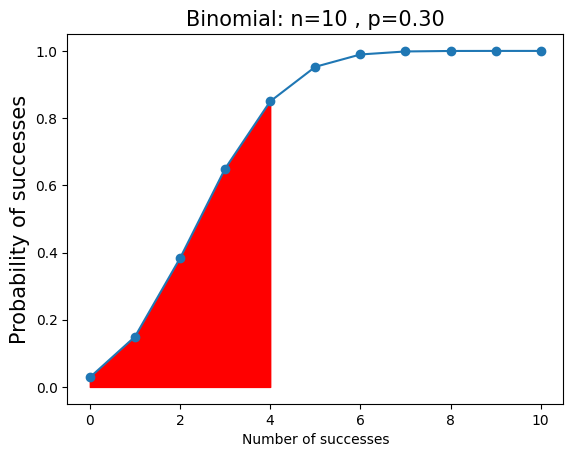

In [2]:
# plot cdf of binumial distribution for n = 10 and p = 0.3
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# set variables

n = 10 # number of trials
p = 0.3 # probability of success

# calculate binomial distribution
number_occurences = np.arange(0, 11, 1) # number of successes - this is an array from 0 to 10
cdf_each_occurence = binom.cdf(number_occurences, n, p) # probability of successes - calculated for each number of successes

# plot binomial distribution
plt.plot(number_occurences, cdf_each_occurence, 'o-')
# fill area under curve for number of successes below 4
plt.fill_between(number_occurences, cdf_each_occurence, where=(number_occurences <= 4), color='red')
plt.title('Binomial: n=%i , p=%.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)

In [25]:
# probability of getting 4 or less successes in 10 trials?

print(f"Probability of getting 4 or less successes in {n} trials: {binom.cdf(4, n, p):.4f}")


Probability of getting 4 or less successes in 10 trials: 0.8497



 **Quantiles, A note**

Quantiles are another way of looking at the CDF. *i.e.*, what is the value of $x$ such that $F(x) = 0.5$? This is called the $0.5$-quantile of the distribution. 




In [34]:
# calculate ppf of binomial distribution for n = 10 and p = 0.3

from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success
quantile_prob= 0.5 # quantile probability
quantile_value = binom.ppf(quantile_prob, n, p) # quantile value
print("What is the 0.5 quantile of the binomial distribution with n = %i and p = %.2f?: %i" % (n, p, quantile_value))
print(f"In others, half the time we get {quantile_value} or fewer successes in {n} trials.")


What is the 0.5 quantile of the binomial distribution with n = 10 and p = 0.30?: 3
In others, half the time we get 3.0 or fewer successes in 10 trials.


### Intervals

Notice that this idea of the **CDF** gives us a new tool: we can now calculate the probability of obtaining a value within a certain interval. For example, what is the probability of obtaining a value between $a$ and $b$? This is simply $F(b) - F(a)$.

Remember Kolmolgorov's axioms? The probability of an event is the sum of the probabilities of the outcomes that make up that event. We are just excluding the outcomes that are not in the interval.

In [35]:
# Probability of getting between 4 and 6 successes in 10 trials?

from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success
prob_interval = binom.cdf(6, n, p) - binom.cdf(4, n, p) # probability of getting between 4 and 6 successes in 10 trials

print(f"Probability of getting between 4 and 6 successes in {n} trials: {prob_interval:.4f}")

Probability of getting between 4 and 6 successes in 10 trials: 0.1397


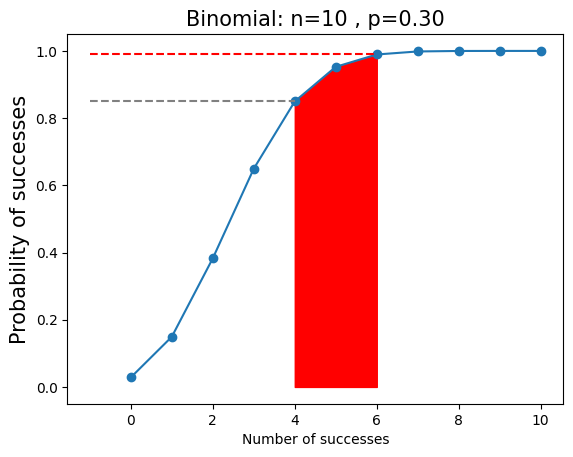

In [11]:
# plot cdf of binomial distribution for n = 10 and p = 0.3
# add horizontal lines for 4 and 6 successes in 10 trials, dashed lines

from scipy.stats import binom

# set variables
n = 10 # number of trials
p = 0.3 # probability of success

# calculate binomial distribution
number_occurences = np.arange(0, 11, 1) # number of successes - this is an array from 0 to 10
cdf_each_occurence = binom.cdf(number_occurences, n, p) # probability of successes - calculated for each number of successes

# plot binomial distribution
plt.plot(number_occurences, cdf_each_occurence, 'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)

# add horizontal lines for 4 and 6 successes in 10 trials, dashed lines that stop at the curve
plt.hlines(binom.cdf(4, n, p), -1, 4, colors='gray', linestyles='dashed')
plt.hlines(binom.cdf(6, n, p), -1, 6, colors='red', linestyles='dashed')
# fill the area between  4 and 6 successes in 10 trials
plt.fill_between(number_occurences, cdf_each_occurence, where=((number_occurences >= 4) & (number_occurences <= 6)), color='red')

plt.show()


#### Applicable to other distributions
Lets do the same for the Poisson distribution with $\lambda = 100$. Lets answer our question about the restaurant above.

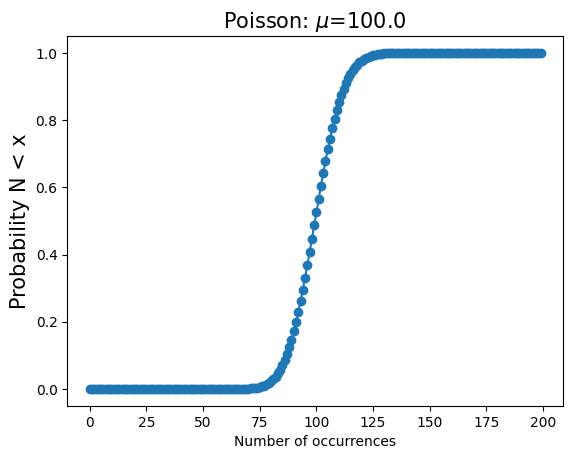

In [43]:

from scipy.stats import poisson

# set variables
mu = 100 # mean

# calculate poisson distribution
number_occurences = np.arange(0, 200, 1) # number of successes - this is an array from 0 to 199
cdf_each_occurence = poisson.cdf(number_occurences, mu) # probability of successes - calculated for each number of successes

# plot poisson distribution
plt.plot(number_occurences, cdf_each_occurence, 'o-')
plt.title('Poisson: $\mu$=%.1f' % mu, fontsize=15)
plt.xlabel('Number of occurrences')
plt.ylabel('Probability N < x', fontsize=15)
plt.show()


In [42]:
## What is the probability that my restaurant receives more than 125 orders in a day?

from scipy.stats import poisson

# set variables 
mu = 100 # mean
prob = 1 - poisson.cdf(125, mu) # probability that my restaurant receives more than 125 orders in a day
print(f"Probability that my restaurant receives more than 125 orders in a day: {prob:.4f}")


# What is the probability that my restaurant receives between 70 and 130 orders in a day?
prob_differece = poisson.cdf(130, mu) - poisson.cdf(70, mu) # probability that my restaurant receives between 70 and 130 orders in a day
print(f"Probability that my restaurant receives between 70 and 130 orders in a day: {prob_differece:.4f}")

Probability that my restaurant receives more than 125 orders in a day: 0.0068
Probability that my restaurant receives between 70 and 130 orders in a day: 0.9973
